In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import wandb

In [2]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: eraldoluis (use `wandb login --relogin` to force relogin)


True

## Load runs

In [3]:
api = wandb.Api()
# sweep_ids = ["1qcd2x0p", "dwqldmag", "s3jg6oju", "cw2quf1k", "68wrws1j", "11su7p2g"]
sweep_ids = ["6wp5xclu", "233pcrb4"]
sweeps = [api.sweep(f"eraldoluis/WeightedCRF_denominator/{sweep_id}") for sweep_id in sweep_ids]

In [4]:
runs = [run for sweep in sweeps for run in sweep.runs]
# run = next(runs)
# next(run.scan_history(keys=["model.label_weights.O", "validation/macro-fscore"]))
len(runs)

158

## Load full history

In [5]:
import pandas as pd 
# import wandb
# api = wandb.Api()

# # Project is specified by <entity/project-name>
# runs = api.runs("eraldoluis/WeightedCRF")

tags = ["O", "PER", "LOC", "ORG", "MISC"]

# columns to select
cols = ["name", "model.label_weights", "_step", "sweep", "model.weight_strategy"]
cols += [f"validation/macro-{m}" for m in ["fscore", "precision", "recall"]]
cols += [f"validation/{tag}-{m}" for tag in tags for m in ["fscore", "precision", "recall"]]

values = []
for run in runs: 
    # .name is the human-readable name of the run.
    val = {"name": run.name}

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    # val.update({
    #     k: v for k, v in run.config.items() 
    #         if not k.startswith('_') and "label_weights" in k})
    val.update({k: v for k, v in run.config.items() if k in cols})

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    # val.update({k: v for k, v in run.summary._json_dict.items() if k in cols})

    for hist in run._full_history():
    # for hist in run._sampled_history(["step"]):
        val_ = val.copy()
        val_.update({k: v for k, v in hist.items() if k in cols})
        values.append(val_)

runs_df = pd.DataFrame(values, columns=cols)

In [6]:
runs_df

,name,model.label_weights,_step,sweep,model.weight_strategy,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,...,validation/PER-recall,validation/LOC-fscore,validation/LOC-precision,validation/LOC-recall,validation/ORG-fscore,validation/ORG-precision,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall
0,sparkling-sweep-54,{'LOC': 3},14,NaN,NaN,0.185144,0.187510,0.201439,0.909904,0.835666,...,0.008574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,sparkling-sweep-54,{'LOC': 3},28,NaN,NaN,0.191556,0.195637,0.204973,0.912665,0.840865,...,0.026993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,sparkling-sweep-54,{'LOC': 3},42,NaN,NaN,0.258644,0.309414,0.249907,0.929515,0.874071,...,0.144808,0.122524,0.264241,0.079752,0.052672,0.138776,0.032505,0.000000,0.000000,0.000000
3,sparkling-sweep-54,{'LOC': 3},56,NaN,NaN,0.307086,0.322262,0.329904,0.974015,0.959227,...,0.463322,0.018100,0.172414,0.009551,0.191875,0.196590,0.187380,0.000000,0.000000,0.000000
4,sparkling-sweep-54,{'LOC': 3},70,NaN,NaN,0.393168,0.389096,0.413136,0.982975,0.972381,...,0.548110,0.000000,0.000000,0.000000,0.339861,0.303726,0.385755,0.183534,0.273865,0.138013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,lively-sweep-1,{'O': 1},300,NaN,emission_transition,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4089,lively-sweep-1,{'O': 1},308,NaN,emission_transition,0.818219,0.826820,0.822710,0.993611,0.992555,...,0.701175,0.825269,0.777215,0.879656,0.724036,0.650419,0.816444,0.738797,0.756824,0.721609
4090,lively-sweep-1,{'O': 1},322,NaN,emission_transition,0.818696,0.819279,0.837526,0.993957,0.993504,...,0.708479,0.856810,0.837283,0.877268,0.752320,0.748934,0.755736,0.676904,0.561622,0.851735
4091,lively-sweep-1,{'O': 1},336,NaN,emission_transition,0.818279,0.817312,0.846121,0.993123,0.995046,...,0.665291,0.870331,0.867236,0.873448,0.752336,0.676988,0.846558,0.684144,0.570601,0.854101


In [29]:
runs_df['model.weight_strategy'].unique()

array([nan, 'emission_transition', 'lannoy'], dtype=object)

In [30]:
runs_df['strategy'] = runs_df['model.weight_strategy'].fillna('emission')
runs_df['strategy'].unique()

array(['emission', 'emission_transition', 'lannoy'], dtype=object)

In [31]:
runs_df

,name,model.label_weights,_step,sweep,model.weight_strategy,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,...,validation/LOC-fscore,validation/LOC-precision,validation/LOC-recall,validation/ORG-fscore,validation/ORG-precision,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall,strategy
0,sparkling-sweep-54,{'LOC': 3},14,NaN,NaN,0.185144,0.187510,0.201439,0.909904,0.835666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,emission
1,sparkling-sweep-54,{'LOC': 3},28,NaN,NaN,0.191556,0.195637,0.204973,0.912665,0.840865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,emission
2,sparkling-sweep-54,{'LOC': 3},42,NaN,NaN,0.258644,0.309414,0.249907,0.929515,0.874071,...,0.122524,0.264241,0.079752,0.052672,0.138776,0.032505,0.000000,0.000000,0.000000,emission
3,sparkling-sweep-54,{'LOC': 3},56,NaN,NaN,0.307086,0.322262,0.329904,0.974015,0.959227,...,0.018100,0.172414,0.009551,0.191875,0.196590,0.187380,0.000000,0.000000,0.000000,emission
4,sparkling-sweep-54,{'LOC': 3},70,NaN,NaN,0.393168,0.389096,0.413136,0.982975,0.972381,...,0.000000,0.000000,0.000000,0.339861,0.303726,0.385755,0.183534,0.273865,0.138013,emission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,lively-sweep-1,{'O': 1},300,NaN,emission_transition,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,emission_transition
4089,lively-sweep-1,{'O': 1},308,NaN,emission_transition,0.818219,0.826820,0.822710,0.993611,0.992555,...,0.825269,0.777215,0.879656,0.724036,0.650419,0.816444,0.738797,0.756824,0.721609,emission_transition
4090,lively-sweep-1,{'O': 1},322,NaN,emission_transition,0.818696,0.819279,0.837526,0.993957,0.993504,...,0.856810,0.837283,0.877268,0.752320,0.748934,0.755736,0.676904,0.561622,0.851735,emission_transition
4091,lively-sweep-1,{'O': 1},336,NaN,emission_transition,0.818279,0.817312,0.846121,0.993123,0.995046,...,0.870331,0.867236,0.873448,0.752336,0.676988,0.846558,0.684144,0.570601,0.854101,emission_transition


## Add individual columns for label weights

In [42]:
base_dict = {k: 1.0 for k in tags}
def transf(w):
    new_d = dict(base_dict)
    new_d.update(w)
    new_d = {f"label_weight_{k}": v for k, v in new_d.items()}
    return pd.Series(new_d)

df_runs_weights = pd.concat([runs_df, runs_df["model.label_weights"].apply(transf)], axis=1)

In [43]:
df_runs_weights.sample(5)

,name,model.label_weights,_step,sweep,model.weight_strategy,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,...,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall,strategy,label_weight_O,label_weight_PER,label_weight_LOC,label_weight_ORG,label_weight_MISC
676,mild-sweep-30,{'PER': 3},70,NaN,NaN,0.355139,0.464380,0.407567,0.988916,0.984629,...,0.577916,0.031698,0.368421,0.016562,emission,1.0,3.0,1.0,1.0,1.0
2261,treasured-sweep-66,{'LOC': 0.5},210,NaN,lannoy,0.786834,0.790168,0.798058,0.993653,0.993316,...,0.803059,0.681187,0.650179,0.715300,lannoy,1.0,1.0,0.5,1.0,1.0
2361,ancient-sweep-62,{'LOC': 0.5},70,NaN,emission_transition,0.413649,0.483477,0.454671,0.982691,0.974999,...,0.076960,0.046647,0.307692,0.025237,emission_transition,1.0,1.0,0.5,1.0,1.0
3521,lyric-sweep-21,{'PER': 1.5},210,NaN,emission_transition,0.868901,0.877365,0.863929,0.993164,0.990760,...,0.730402,0.768710,0.734723,0.805994,emission_transition,1.0,1.5,1.0,1.0,1.0
3123,royal-sweep-35,{'PER': 2},140,NaN,emission_transition,0.509003,0.488972,0.579449,0.992057,0.988098,...,0.789197,0.439842,0.586842,0.351735,emission_transition,1.0,2.0,1.0,1.0,1.0


## Get only results on the last step

In [44]:
df_last_step = df_runs_weights.groupby("name").last()
df_last_step

,model.label_weights,_step,sweep,model.weight_strategy,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,validation/O-recall,...,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall,strategy,label_weight_O,label_weight_PER,label_weight_LOC,label_weight_ORG,label_weight_MISC
name,,,,,,,,,,,,,,,,,,,,,
absurd-sweep-25,{'PER': 1.5},350,NaN,emission_transition,0.841157,0.887655,0.824107,0.992338,0.988128,0.996585,...,0.858509,0.825100,0.946885,0.731073,emission_transition,1.0,1.5,1.0,1.0,1.0
absurd-sweep-36,{'PER': 2},350,NaN,emission_transition,0.847553,0.872611,0.848470,0.992379,0.990403,0.994364,...,0.929254,0.831683,0.871972,0.794953,emission_transition,1.0,2.0,1.0,1.0,1.0
ancient-sweep-62,{'LOC': 0.5},350,NaN,emission_transition,0.846899,0.887644,0.817924,0.988734,0.980101,0.997521,...,0.800191,0.697111,0.851936,0.589905,emission_transition,1.0,1.0,0.5,1.0,1.0
apricot-sweep-65,{'LOC': 0.5},350,NaN,lannoy,0.801162,0.905662,0.728084,0.971261,0.945340,0.998644,...,0.624761,0.808855,0.878816,0.749211,lannoy,1.0,1.0,0.5,1.0,1.0
astral-sweep-40,{'LOC': 1.5},350,NaN,None,0.831667,0.842020,0.841558,0.993516,0.992623,0.994411,...,0.819312,0.742057,0.654611,0.856467,emission,1.0,1.0,1.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wobbly-sweep-77,{'LOC': 1.5},350,NaN,lannoy,0.875444,0.883161,0.873979,0.994014,0.993851,0.994177,...,0.869503,0.837362,0.871270,0.805994,lannoy,1.0,1.0,1.5,1.0,1.0
worthy-sweep-13,{'PER': 1.5},350,NaN,None,0.868775,0.895245,0.851730,0.987919,0.978658,0.997357,...,0.824092,0.783088,0.733471,0.839905,emission,1.0,1.5,1.0,1.0,1.0
worthy-sweep-5,{'O': 1},350,NaN,lannoy,0.870557,0.879446,0.869592,0.993648,0.992234,0.995065,...,0.712715,0.751357,0.694314,0.818612,lannoy,1.0,1.0,1.0,1.0,1.0


## Masks of results with weight equal 1.0 for each tag

In [45]:
masks_weight1 = [df_last_step[f"label_weight_{tag}"] == 1.0 for tag in tags]

## Number of runs with weight different of 1.0 for each tag

In [46]:
for i_tag, mask in enumerate(masks_weight1):
    print(f"{tags[i_tag]}: {len(mask) - mask.sum()}")

O: 0
PER: 72
LOC: 61
ORG: 0
MISC: 0


### Stratified per weighting strategy

In [47]:
for strategy, df in df_last_step.groupby("strategy"):
    print(f"Strategy: {strategy}")
    for i_tag, mask in enumerate(masks_weight1):
        print(f"\t{tags[i_tag]}: {len(mask.loc[df.index]) - mask.loc[df.index].sum()}")

Strategy: emission
	O: 0
	PER: 24
	LOC: 24
	ORG: 0
	MISC: 0
Strategy: emission_transition
	O: 0
	PER: 24
	LOC: 19
	ORG: 0
	MISC: 0
Strategy: lannoy
	O: 0
	PER: 24
	LOC: 18
	ORG: 0
	MISC: 0


## DataFrame with varying weights for only one tag
Return a `DataFrame` in which the weight of only one tag varies.
All other tags will have weight equal to 1.0.

In [48]:
import numpy as np
def get_df_var_weight_for_tag(idx_tag):
    masks_not1 = [mask for i_tag, mask in enumerate(masks_weight1) if i_tag != idx_tag]
    masks_not1_and = np.logical_and.reduce(masks_not1)
    return df_last_step[masks_not1_and]

### DataFrame in long format
This format is necessary for seaborn.

In [49]:
def get_df_melted_var_weight_for_tag(i_tag):
    value_cols = [
        "validation/macro-fscore", 
        f"validation/{tags[i_tag]}-fscore",
        f"validation/{tags[i_tag]}-precision",
        f"validation/{tags[i_tag]}-recall"
    ]
    return get_df_var_weight_for_tag(i_tag).melt(id_vars=[f"label_weight_{tags[i_tag]}", "strategy"], value_vars=value_cols)

In [50]:
get_df_melted_var_weight_for_tag(1)

,label_weight_PER,strategy,variable,value
0,1.5,emission_transition,validation/macro-fscore,0.841157
1,2.0,emission_transition,validation/macro-fscore,0.847553
2,1.5,lannoy,validation/macro-fscore,0.832200
3,2.0,lannoy,validation/macro-fscore,0.837589
4,0.5,emission_transition,validation/macro-fscore,0.860439
...,...,...,...,...
339,0.5,lannoy,validation/PER-recall,0.938393
340,1.5,emission,validation/PER-recall,0.737695
341,1.0,lannoy,validation/PER-recall,0.931407
342,2.0,lannoy,validation/PER-recall,0.898380


## Plots of performances when varying weights

In [86]:
def plot_metrics_var_weight_for_tag(i_tag):
    df = get_df_melted_var_weight_for_tag(i_tag)
    strategies = ['emission', 'emission_transition', 'lannoy']
    _, axs = plt.subplots(1, 3, figsize=(24,6), sharey=True)
    for ax, strategy in zip(axs, strategies):
        sns.lineplot(ax=ax, data=df[df.strategy == strategy], x=f"label_weight_{tags[i_tag]}", y="value", hue="variable")
        ax.set_title(f"Strategy: {strategy}")
        ax.set_ylim([0.6,1.0])

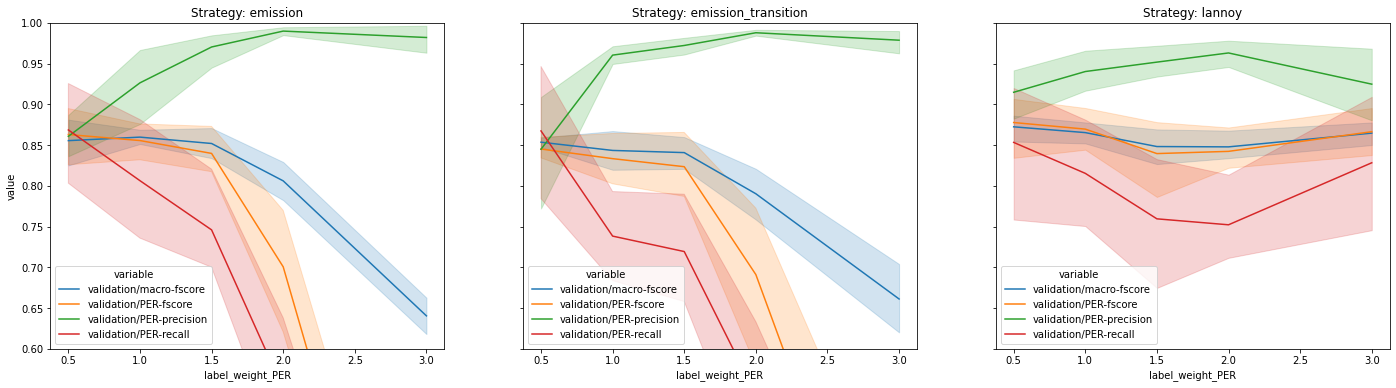

In [87]:
plot_metrics_var_weight_for_tag(1)

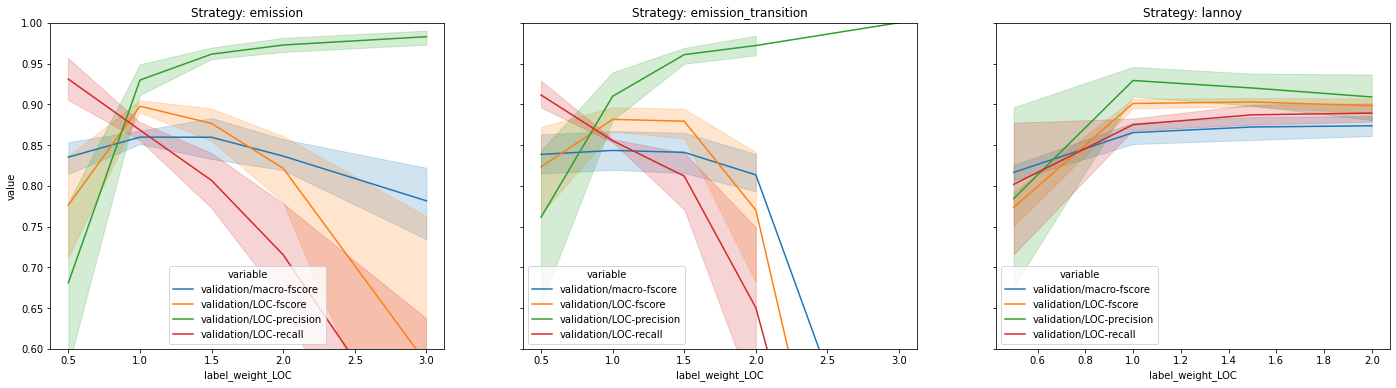

In [88]:
plot_metrics_var_weight_for_tag(2)

## Tables

In [89]:
get_df_melted_var_weight_for_tag(1).groupby(['variable', 'label_weight_PER', 'strategy']).agg(['mean', 'std'])

value  \
                                                                   mean   
variable                 label_weight_PER strategy                        
validation/PER-fscore    0.5              emission             0.862871   
                                          emission_transition  0.845134   
                                          lannoy               0.877625   
                         1.0              emission             0.855506   
                                          emission_transition  0.833312   
                                          lannoy               0.869527   
                         1.5              emission             0.839744   
                                          emission_transition  0.823450   
                                          lannoy               0.839530   
                         2.0              emission             0.700654   
                                          emission_transition  0.691131   
                                          lannoy               0.842251   
                         3.0              emission             0.094183   
                                          emission_transition  0.212742   
                                          lannoy               0.866359   
validation/PER-precision 0.5              emission             0.860672   
                                          emission_transition  0.844828   
                                          lannoy               0.914711   
                         1.0              emission             0.926276   
                                          emission_transition  0.960281   
                                          lannoy               0.940154   
                         1.5              emission             0.970258   
                                          emission_transition  0.972116   
                                          lannoy               0.951699   
                         2.0              emission             0.989747   
                                          emission_transition  0.987724   
                                          lannoy               0.962941   
                         3.0              emission             0.981891   
                                          emission_transition  0.978585   
                                          lannoy               0.924666   
validation/PER-recall    0.5              emission             0.868530   
                                          emission_transition  0.867312   
                                          lannoy               0.853234   
                         1.0              emission             0.806288   
                                          emission_transition  0.738330   
                                          lannoy               0.815285   
                         1.5              emission             0.745951   
                                          emission_transition  0.719382   
                                          lannoy               0.759500   
                         2.0              emission             0.550863   
                                          emission_transition  0.544247   
                                          lannoy               0.752196   
                         3.0              emission             0.052027   
                                          emission_transition  0.133005   
                                          lannoy               0.828252   
validation/macro-fscore  0.5              emission             0.855405   
                                          emission_transition  0.853480   
                                          lannoy               0.872356   
                         1.0              emission             0.859719   
                                          emission_transition  0.843393   
                                          lannoy               0.865254   
                